In [1]:
import time
start_time = time.time()

#Αναγνωστάκη Ηρ΄ώ 3140008
#Βαγγελάκης Ορφέας 3140018

#import libs
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

#load the two datasets
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

print('[Describe]-------------------------------------------------------------------')
print(train.describe())
print('[Types]-------------------------------------------------------------------')
print(train.dtypes)
#print(test.dtypes)
#print('[LongitudeDeparture]-------------------------------------------------------------------')
#print(train["LongitudeDeparture"].describe())
#print('[LatitudeDeparture]-------------------------------------------------------------------')
#print(train["LatitudeDeparture"].describe())
#print('[LongitudeArrival]-------------------------------------------------------------------')
#print(train["LongitudeArrival"].describe())
#print('[LatitudeArrival]-------------------------------------------------------------------')
#print(train["LatitudeArrival"].describe())
#print('[WeeksToDeparture]-------------------------------------------------------------------')
#print(train["WeeksToDeparture"].describe())
#print('[std_wtd]-------------------------------------------------------------------')
#print(train["std_wtd"].describe())
#print('[PAX]-------------------------------------------------------------------')
#print(train["PAX"].describe())

[Describe]-------------------------------------------------------------------
       LongitudeDeparture  LatitudeDeparture  LongitudeArrival  \
count         8899.000000        8899.000000       8899.000000   
mean            37.808886         -93.742886         37.736862   
std              4.665040          17.447421          4.704364   
min             25.793250        -122.374889         25.793250   
25%             33.636719        -112.011583         33.636719   
50%             39.861656         -87.904842         39.861656   
75%             41.978603         -80.290556         41.978603   
max             47.449000         -71.005181         47.449000   

       LatitudeArrival  WeeksToDeparture      std_wtd          PAX  
count      8899.000000       8899.000000  8899.000000  8899.000000  
mean        -93.677790         11.459248     8.625380     3.645915  
std          17.498414          2.797870     2.139732     2.492679  
min        -122.374889          2.625000     2.1602

In [2]:
train.head()

,DateOfDeparture,Departure,CityDeparture,LongitudeDeparture,LatitudeDeparture,Arrival,CityArrival,LongitudeArrival,LatitudeArrival,WeeksToDeparture,std_wtd,PAX
0,2011-12-05,ORD,Chicago,41.978603,-87.904842,EWR,Newark,40.692500,-74.168667,8.352941,5.667243,7
1,2013-03-01,ATL,Atlanta,33.636719,-84.428067,LGA,New York,40.777245,-73.872608,10.421053,10.001754,7
2,2012-02-06,ORD,Chicago,41.978603,-87.904842,BOS,Boston,42.364347,-71.005181,9.250000,7.136821,7
3,2012-12-10,ORD,Chicago,41.978603,-87.904842,SFO,San Francisco,37.618972,-122.374889,8.666667,7.404291,7
4,2012-04-13,SFO,San Francisco,37.618972,-122.374889,JFK,New York,40.639751,-73.778925,14.037037,9.858544,7


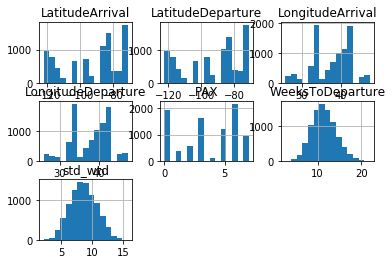

In [3]:
train.hist(bins=15);

In [4]:
#apo to describe parathroume oti to std(kanonikh katanomh) twn pax , std_wtd kai WeeksToDeparture moiazoun
# ta istogramata std_wkd kai weekstodeparture moiazoun
train['WeeksToDeparture'].std()

2.7978703285667104

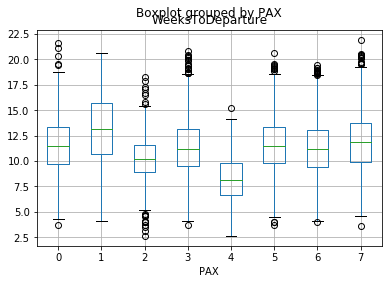

In [5]:
train.boxplot(column='WeeksToDeparture', by='PAX')

In [6]:
#dokimazw na afairesw apo to weektodeparture to std_wtd mean wkd > std
#prospa8hsame na a3iopoihsoume tous pinakes autous alla xwris epituxia

#sub = train['WeeksToDeparture'].subtract(train['std_wtd'], fill_value=0)
#sub_test = test['WeeksToDeparture'].subtract(test['std_wtd'], fill_value=0)
#print(sub.head())
#print(train['WeeksToDeparture'].head())
#print(train['std_wtd'].head())
#print(sub.describe())
#print(sub_test.describe())


In [7]:
#analuw to DateOfDeparture se ena dataframe me onoma date kai sthles year , month , day ,week , weekday
date = train.copy()
date['DateOfDeparture'] = pd.to_datetime(date['DateOfDeparture'])
date['year'] = date['DateOfDeparture'].dt.year
date['month'] = date['DateOfDeparture'].dt.month
date['day'] = date['DateOfDeparture'].dt.day
date['weekday'] = date['DateOfDeparture'].dt.weekday
date['week'] = date['DateOfDeparture'].dt.week
date= date[['year','month','day','week','weekday']]#'weekday'
print(date.head())

   year  month  day  week  weekday
0  2011     12    5    49        0
1  2013      3    1     9        4
2  2012      2    6     6        0
3  2012     12   10    50        0
4  2012      4   13    15        4


In [8]:
date_test = test.copy()
date_test['DateOfDeparture'] = pd.to_datetime(date_test['DateOfDeparture'])
date_test['year'] = date_test['DateOfDeparture'].dt.year
date_test['month'] = date_test['DateOfDeparture'].dt.month
date_test['day'] = date_test['DateOfDeparture'].dt.day
date_test['weekday'] = date_test['DateOfDeparture'].dt.weekday
date_test['week'] = date_test['DateOfDeparture'].dt.week
date_test = date_test[['year','month','day','week','weekday']]
print(date_test.head())

   year  month  day  week  weekday
0  2012     10   21    42        6
1  2012      9   13    37        3
2  2012      9    4    36        1
3  2012      8   13    33        0
4  2012      9   10    37        0


In [9]:
le = LabelEncoder()

le.fit(train['Departure'])
train['Departure'] = le.transform(train['Departure'])
test['Departure'] = le.transform(test['Departure'])
train['Arrival'] = le.transform(train['Arrival'])
test['Arrival'] = le.transform(test['Arrival'])

le.fit(train['CityDeparture'])
train['CityDeparture'] = le.transform(train['CityDeparture'])
test['CityDeparture'] = le.transform(test['CityDeparture'])
train['CityArrival'] = le.transform(train['CityArrival'])
test['CityArrival'] = le.transform(test['CityArrival'])
  
le.fit(train['DateOfDeparture'])
train['DateOfDeparture'] = le.transform(train['DateOfDeparture'])
test['DateOfDeparture'] = le.transform(test['DateOfDeparture'])

In [10]:
#X is for the features and Y is for the labels
Y_train = train[['PAX']]
train = train.drop('PAX', axis=1)

In [11]:
X_train = train[['DateOfDeparture','Departure','CityDeparture','Arrival','CityArrival']]#,'WeeksToDeparture','std_wtd'
X_test = test[['DateOfDeparture','Departure','CityDeparture','Arrival','CityArrival']]

X_train = pd.concat([X_train, date], axis=1, sort=False)
X_test = pd.concat([X_test, date_test], axis=1, sort=False)

X_train = X_train.drop(['day','week'],axis=1)
X_test = X_test.drop(['day','week'],axis=1)

#X_train = pd.concat([X_train, sub], axis=1, sort=False)
#X_test = pd.concat([X_test, sub_test], axis=1, sort=False)

#X_train = X_train.drop(['DateOfDeparture'],axis=1)
#X_test = X_test.drop(['DateOfDeparture'],axis=1)

#X_train = X_train.drop(['month','day'],axis=1)
#X_test = X_test.drop(['month','day'],axis=1)

#print('[Train]-------------------------------------------------------------------')
#print(X_train.head())
#print('[Test]--------------------------------------------------------------------')
#print(X_test.head())


#TESTS

#MLP no date , day 0.38622
#MLP no date , month 0.39820
#MLP no date , year 0.41317
#added weekday 4/1/19
#MLP no date , weekday 0.60628
#MLP no date , weekday, year 0.51796

#MLP no date , day , month , year , weekday 0.55688
#MLP no date , day , month , year 0.46107
#MLP no date , day , month , weekday 0.59880
#MLP no date , day , year , weekday 0.50748
#MLP no date , month , year , weekday 0.54341

#MLP date , day  0.53443
#MLP date , month  0.54790
#MLP date , year  0.59431
#added weekday , week 4/1/19
#MLP date , weekday 0.52844
#MLP date , weekday, year 0.61826


#MLP date , day , month , year 0.54940

#MLP date , no day , month, year , weekday , week 0.61077
#MLP no date , no day , month, year , weekday , week 0.60329

#MLP date , no day , month, year , week  0.41017

#MLP date ,no day , no month, no year ,weekday, week  0.56287

#MLP date ,  day , no month, year , weekday , week 0.59580
#MLP date , no day , no month, year , weekday , week 0.60329
#MLP no date , no day , no month, year , weekday , week 0.59431

#MLP date 500 iterations 0.55688
#MLP date 1000 iterations 0.51497


#exoume  5 sthles opou gia thn ka8e mia mporoume eite na thn baloume eite na thn kanoume drop
#MLP date , day , month , year , weekday 0.62425
#MLP no date , day , month , year , weekday 0.55688

#MLP date , no day , month, year , weekday, no week 0.64221
#MLP no date , no day , month , year , weekday 0.54341

#MLP date ,  day , no month , year , weekday 0.59730
#MLP no date ,  day , no month , year , weekday 0.50748
#MLP date ,  no day , no month , year , weekday 0.61826
#MLP no date ,  no day , no month , year , weekday 0.51796

#MLP date , day ,  month , no year , weekday 0.60329
#MLP no date , day ,  month , no year , weekday 0.59880
#MLP  date , no day ,  month , no year , weekday 0.60628
#MLP no date , no day ,  month , no year , weekday 0.54790
#mperdema . . .

#TOP SCORE
#MLP date , no day , month, year , weekday, no week 

In [12]:
print(X_train.head())
print('--------------------------------------------------------------')
print(X_test.head())

   DateOfDeparture  Departure  CityDeparture  Arrival  CityArrival  year  \
0               95         15              3        6           13  2011   
1              547          0              0       11           12  2013   
2              158         15              3        1            1  2012   
3              466         15              3       19           17  2012   
4              225         19             17        8           12  2012   

   month  weekday  
0     12        0  
1      3        4  
2      2        0  
3     12        0  
4      4        4  
--------------------------------------------------------------
   DateOfDeparture  Departure  CityDeparture  Arrival  CityArrival  year  \
0              416          4              4       19           17  2012   
1              378         10              9        0            0  2012   
2              369         15              3        7            7  2012   
3              347          3              5       17   

In [13]:
#Y_train = np.ravel(Y_train)
#feature_list = list(X_train.columns)
#features = np.array(X_train)
#
#from sklearn.ensemble import RandomForestRegressor
#rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
#rf.fit(X_train, Y_train)

#importances = list(rf.feature_importances_)
#feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
#feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

In [14]:
#X_train = X_train[['DateOfDeparture','day','week','weekday','CityDeparture']]#,'WeeksToDeparture','std_wtd'
#X_test = X_test[['DateOfDeparture','day','week','weekday','CityDeparture']]

In [15]:
print(X_train.shape)
print('--------------------------------------------------------------')
print(X_test.shape)

(8899, 8)
--------------------------------------------------------------
(2229, 8)


In [16]:
enc = OneHotEncoder(sparse=False)
enc.fit(X_train)  #kamia beltiwsh test,_train \ train,Y_train
X_train = enc.transform(X_train)
X_test = enc.transform(X_test)

In [17]:
print(X_train.shape)
print('--------------------------------------------------------------')
print(X_test.shape)

(8899, 652)
--------------------------------------------------------------
(2229, 652)


In [18]:
Y_train = np.ravel(Y_train)

In [19]:
#LogisticRegression
#clf = LogisticRegression(C=10)#lab
#clf.fit(X_train, Y_train)# finds out the relation between X and Y
#y_pred = clf.predict(X_test)

In [20]:
#0.15568 
#from sklearn.naive_bayes import GaussianNB
#gnb = GaussianNB()
#gnb.fit(X_train, Y_train)
#y_pred = gnb.predict(X_test)

In [21]:
#0.39970
#from sklearn.naive_bayes import MultinomialNB
#clf = MultinomialNB()
#clf.fit(X_train, Y_train)
#y_pred = clf.predict(X_test)

In [22]:
#0.31886 ,K=3
#0.37125 ,K=10
#from sklearn.neighbors import KNeighborsClassifier
#k = 10
#clf = KNeighborsClassifier(k)
#clf.fit(X_train, Y_train)
#y_pred = clf.predict(X_test)

In [23]:
from sklearn.neural_network import MLPClassifier #hidden_layer_sizes=(100,100,100)#505 #550 #525 #510 #506 #503 #505 #sgd 0.64371 #adam  0.58682  #lbfgs  0.63922
MLP = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=505, alpha=0.0001, solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
MLP.fit(X_train, Y_train)
y_pred = MLP.predict(X_test)

Iteration 1, loss = 1.99758025
Iteration 2, loss = 1.95801663
Iteration 3, loss = 1.92817723
Iteration 4, loss = 1.90703433
Iteration 5, loss = 1.89222711
Iteration 6, loss = 1.88174332
Iteration 7, loss = 1.87404844
Iteration 8, loss = 1.86820194
Iteration 9, loss = 1.86344753
Iteration 10, loss = 1.85956366
Iteration 11, loss = 1.85616680
Iteration 12, loss = 1.85313828
Iteration 13, loss = 1.85034475
Iteration 14, loss = 1.84775208
Iteration 15, loss = 1.84524396
Iteration 16, loss = 1.84273494
Iteration 17, loss = 1.84015638
Iteration 18, loss = 1.83761819
Iteration 19, loss = 1.83496454
Iteration 20, loss = 1.83227315
Iteration 21, loss = 1.82926884
Iteration 22, loss = 1.82620693
Iteration 23, loss = 1.82292382
Iteration 24, loss = 1.81949238
Iteration 25, loss = 1.81578957
Iteration 26, loss = 1.81190486
Iteration 27, loss = 1.80779969
Iteration 28, loss = 1.80324741
Iteration 29, loss = 1.79837000
Iteration 30, loss = 1.79322963
Iteration 31, loss = 1.78776487
Iteration 32, los

Iteration 253, loss = 0.71588449
Iteration 254, loss = 0.71303899
Iteration 255, loss = 0.71029983
Iteration 256, loss = 0.70855048
Iteration 257, loss = 0.70560018
Iteration 258, loss = 0.70389267
Iteration 259, loss = 0.70071478
Iteration 260, loss = 0.69865068
Iteration 261, loss = 0.69609625
Iteration 262, loss = 0.69356040
Iteration 263, loss = 0.69142429
Iteration 264, loss = 0.68921156
Iteration 265, loss = 0.68686657
Iteration 266, loss = 0.68392135
Iteration 267, loss = 0.68249152
Iteration 268, loss = 0.67968235
Iteration 269, loss = 0.67708826
Iteration 270, loss = 0.67473847
Iteration 271, loss = 0.67298528
Iteration 272, loss = 0.67047458
Iteration 273, loss = 0.66861956
Iteration 274, loss = 0.66563050
Iteration 275, loss = 0.66446085
Iteration 276, loss = 0.66138085
Iteration 277, loss = 0.65996434
Iteration 278, loss = 0.65632855
Iteration 279, loss = 0.65533456
Iteration 280, loss = 0.65315268
Iteration 281, loss = 0.65112435
Iteration 282, loss = 0.64751116
Iteration 

Iteration 503, loss = 0.20706295
Iteration 504, loss = 0.20490401
Iteration 505, loss = 0.20290440


G:\Programs\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (505) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [24]:
#export csv
with open('y_pred.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['Id', 'Label'])
    for i in range(y_pred.shape[0]):
        writer.writerow([i, y_pred[i]]) 
        

In [25]:
elapsed_time = time.time() - start_time
elapsed_time

67.62352442741394